In [1]:
from benchmark import *
%matplotlib inline

In [2]:
def make_table(target_df, family_df):
    table = []

    target_df = target_df.sort_values(['family', 'glide_correct'], ascending=[True, False])
    for family in family_df.index.get_level_values('family'):
        family_level = family_df[family_df.index.get_level_values('family') == family].copy()
        target_level = target_df[target_df.index.get_level_values('family') == family].copy()
        
        family_level['protein'] = family

        # index
        family_level.reset_index(inplace=True)
        target_level.reset_index(inplace=True)
        family_level = family_level.set_index(['family', 'protein'])
        target_level = target_level.set_index(['family', 'protein'])
        table += [family_level]
        table += [target_level]
    table = pd.concat(table).filter(regex='correct').round(2)
    table.rename(columns={'combind_correct':'combind',
                          'glide_correct':'glide',
                          'best_correct':'best',
                          }, inplace=True)
    return table

def dumbell(table, drug, save=None):
    f, ax = plt.subplots(figsize=(12, 3))

    for y in [0.25, 0.5, 0.75]:
        plt.axhline(y, ls='--', c = 'grey', alpha = 0.25)

    last = None
    i = -1
    yticks, ylabels = [], []
    for label, values in table.iterrows():
        
        if label[-1] in ['MGLUR5', 'GLUT1', 'ELANE']: continue
        
        ylabels += [label[-1]]
        if label[1] in drugs:
            continue
            
        width=0.25
        i += 1
        yticks += [i]
        g, c = values[['glide','combind']]
        plt.bar([i+width], [c], width=width, color='darkgreen')
        plt.bar([i], [g], width=width, color='silver')
        
    plt.xticks(np.array(yticks)+width/2, [])
    plt.yticks(np.linspace(0, 1, 5), [])
    plt.ylim(0, 1)
    plt.xlim(yticks[0]-2*width, yticks[-1]+3*width)

    if save:
        plt.savefig('../../../illustrator/benchmark/img/{}.pdf'.format(save))
    plt.show()
    
def dumbell_gpcr(table, drug, save=None):
    f, ax = plt.subplots(figsize=(12, 3))

    for y in [0.25, 0.5, 0.75]:
        plt.axhline(y, ls='--', c = 'grey', alpha = 0.25)

    last = None
    i = -1
    yticks, ylabels = [], []
    for label, values in table.iterrows():
        
        if label[-1] in ['MGLUR5', 'GLUT1', 'ELANE']: continue
        
        ylabels += [label[-1]]

        if label[1] in drugs:
            continue
            


        width=0.25
        i += 1
        yticks += [i]
        g, c = values[['glide','combind']]
        plt.bar([i+width], [c], width=width, color='darkgreen')
        plt.bar([i], [g], width=width, color='silver')
        
    plt.xticks(np.array(yticks)+width/2, [])
    plt.yticks(np.linspace(0, 1, 5), [])
    plt.ylim(0, 1)
    plt.xlim(yticks[0]-2*width, yticks[-1]+3*width)

    if save:
        plt.savefig('../../../illustrator/benchmark/img/{}.pdf'.format(save))
    plt.show()

def run(helpers, aggregate, method='standard', save=None):
    ligs = 0 if helpers == 'pdb' else 20
    data = get_data(helpers, ['stats104'], True)
    ligand = data.xs((helpers, method, ligs, 'mcss_contact_hbond_sb', 1.0),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    if aggregate == 'target':
        family = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    elif aggregate == 'ligand':
        family = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    table = make_table(target, family)
    dumbell_gpcr(table, drug_average(family), save)
    print(drug_average(family).filter(regex='correct'))
    return table

248


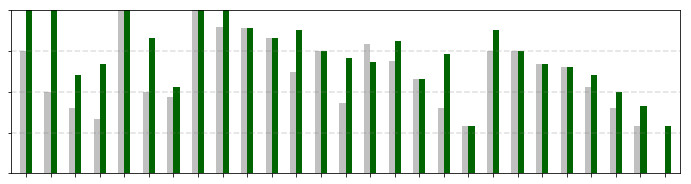

          combind_correct  glide_correct  best_correct
version                                               
stats104         0.701186       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.72   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  1.00   0.50   1.0
                 5HT2B                0.60   0.40   1.0
                 B1AR                 0.67   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Ion Channel      Ion Channel          0.68   0.56   1.0
                 Q05586-Q12879        1.00   1.00   1.0
                 P19491               0.83   0.50   1.0
                 P22756               0.53   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.90   0.83   1.0
                 VDR                  1.00   1.00   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.88   0.62   1.0
Transporter      Transporter          0.67   0.50   1.0
                 SLC6A4               0.75   0.75   1.0
                 DAT                  0.71   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.67   0.59   1.0
                 PLAU                 0.68   0.79   1.0
                 P00760               0.81   0.69   1.0
                 F10                  0.58   0.58   1.0
                 F2                   0.73   0.40   1.0
                 BACE1                0.29   0.29   1.0
Other            Other                0.56   0.48   1.0
                 PTPN1                0.88   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.65   0.65   1.0
                 DHFR                 0.60   0.53   1.0
                 HSP90AA1             0.50   0.40   1.0
                 PDE10A               0.41   0.29   1.0
                 BRD4                 0.29   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [3]:
run('best_affinity_diverse', 'ligand')

248


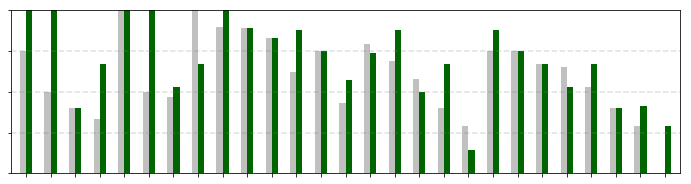

          combind_correct  glide_correct  best_correct
version                                               
stats104         0.674366       0.543016           1.0


combind  glide  best
family           protein                               
GPCR             GPCR                 0.67   0.44   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  1.00   0.50   1.0
                 5HT2B                0.40   0.40   1.0
                 B1AR                 0.67   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Ion Channel      Ion Channel          0.72   0.56   1.0
                 Q05586-Q12879        1.00   1.00   1.0
                 P19491               1.00   0.50   1.0
                 P22756               0.53   0.47   1.0
Nuclear Receptor Nuclear Receptor     0.88   0.83   1.0
                 VDR                  0.67   1.00   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.88   0.62   1.0
Transporter      Transporter          0.58   0.50   1.0
                 SLC6A4               0.75   0.75   1.0
                 DAT                  0.57   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.65   0.59   1.0
                 PLAU                 0.74   0.79   1.0
                 P00760               0.88   0.69   1.0
                 F10                  0.50   0.58   1.0
                 F2                   0.67   0.40   1.0
                 BACE1                0.14   0.29   1.0
Other            Other                0.54   0.48   1.0
                 PTPN1                0.88   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 CDK2                 0.53   0.65   1.0
                 DHFR                 0.67   0.53   1.0
                 HSP90AA1             0.40   0.40   1.0
                 PDE10A               0.41   0.29   1.0
                 BRD4                 0.29   0.00   1.0
                 ELANE                0.00   0.00   1.0

In [4]:
run('best_mcss', 'ligand')